<a href="https://colab.research.google.com/github/daalopezm/Sign-Lenguaje-DL/blob/main/Sign_Lenguaje_Capturing_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
# /content/gdrive/MyDrive/Portafolio/SignLenguaje

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
import tensorflow as tf
import json
import os

In [3]:
WORK_DIRECTORY = '/content/gdrive/MyDrive/Portafolio/SignLenguaje'

In [4]:
paths = {
    'WEIGHTS': os.path.join(WORK_DIRECTORY,'checkpoints','checkpoints_13-0.7056')
}

In [5]:
with open(os.path.join(WORK_DIRECTORY,'hypermodel_architecture.json')) as j:
  model_architecture=json.load(j)

model = tf.keras.Sequential.from_config(config=model_architecture)

In [6]:
model.load_weights(paths['WEIGHTS'])

<h1>Making predictions with the model</h1>
<p>The model has the method predict, which receive as input a tensor. This tensor is just an image</p>

In [7]:
import pandas as pd
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

WORK_DIRECTORY='/content/gdrive/MyDrive/Portafolio/SignLenguaje/'

file_train = os.path.join(WORK_DIRECTORY,'sign_mnist_train/sign_mnist_train.csv')
file_test = os.path.join(WORK_DIRECTORY,'sign_mnist_test/sign_mnist_test.csv')

data_set = {'TRAIN': pd.read_csv(file_train), 'TEST': pd.read_csv(file_test)}

In [8]:
images_csv_train = [np.array(data_set['TRAIN'].iloc[i,1:785],dtype=np.uint8).reshape(28,28) 
          for i in range(data_set['TRAIN'].shape[0])] 
images_csv_test = [np.array(data_set['TEST'].iloc[i,1:785],dtype=np.uint8).reshape(28,28) 
          for i in range(data_set['TEST'].shape[0])] 


In [9]:
import string

In [10]:
alphabetic_letters = np.array([char for char in string.ascii_lowercase if char != 'j' if char != 'z'])
numeric_letters = np.unique(data_set['TRAIN']['label'])

In [11]:
number = 766

In [12]:
alphabetic_letters[numeric_letters == data_set['TEST'].iloc[number,0]][0]

'e'

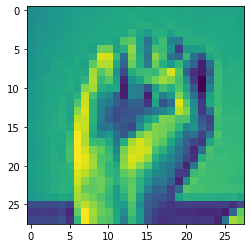

In [13]:
plt.imshow(images_csv_test[number])

In [14]:
input_tensor = tf.convert_to_tensor(np.expand_dims(images_csv_test[number], 0), dtype=tf.float32)
outputs=model.predict(input_tensor)
alphabetic_letters[outputs[0]>0.6][0]

'e'

<h1>Image managment with python</h1>

<p>Here I will use a image, that i took from the internet. We will cut and adapt to our necesities.</p>

In [81]:
from skimage import io
from skimage.transform import resize

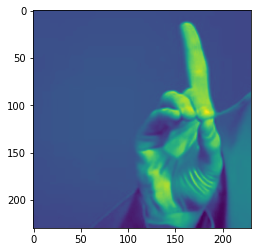

In [124]:
image_gray = io.imread(os.path.join(WORK_DIRECTORY,'photo_validation','d.jpg'),as_gray=True)
a=218
b=70
c=230
image_hand = image_gray[a:a+c,b:b+c]
plt.imshow(image_hand)

In [125]:
image_gray_resized = resize(image_hand, (28, 28),anti_aliasing=True)

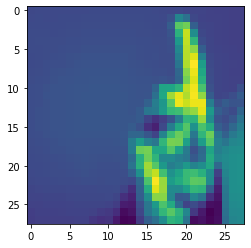

In [126]:
plt.imshow(image_gray_resized)

In [127]:
input_tensor = tf.convert_to_tensor(np.expand_dims(image_gray_resized, 0), dtype=tf.float32)
outputs=model.predict(input_tensor)
outputs

array([[1.73748926e-09, 6.01434331e-05, 6.60220439e-06, 7.78798712e-05,
        9.20823823e-06, 1.42773882e-01, 1.62945408e-02, 1.06680352e-06,
        7.21669494e-05, 1.41028195e-05, 2.03259056e-04, 7.10961558e-07,
        3.24105687e-10, 1.58331008e-04, 7.95533007e-04, 9.70169989e-09,
        3.38541786e-03, 3.21951769e-02, 2.10948710e-04, 4.96066207e-07,
        3.78200486e-02, 5.76172352e-01, 1.89743906e-01, 4.22989342e-06]],
      dtype=float32)

In [63]:
import scipy.ndimage as nd
img_circles = io.imread(os.path.join(WORK_DIRECTORY,'photo_validation','circles.jpg'),as_gray=True)

(-0.5, 231.5, 275.5, -0.5)

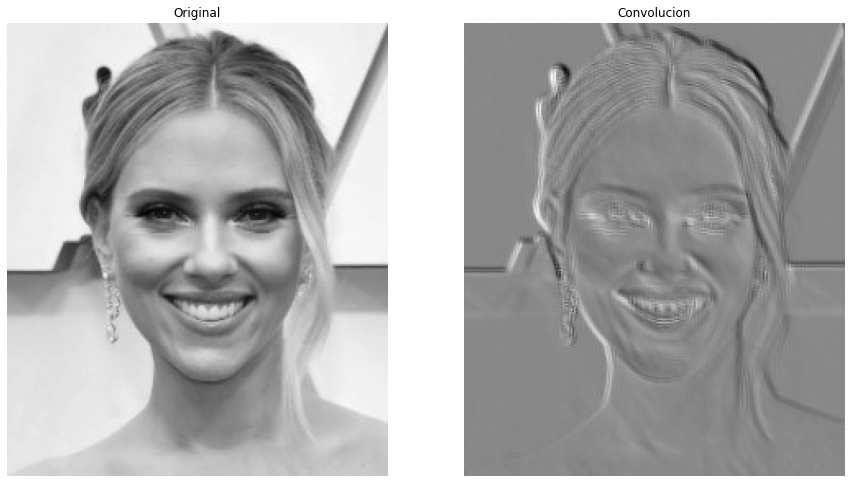

In [70]:
kernel = np.array([[0, -1, 0, -1],
                    [1, 0, 1, 0],
                    [0, -1, 0, -1],
                   [0, 1, 0, 1]])

#utilizo la traspuesta de kernel
img_new = nd.convolve(img_circles, kernel.T)
fig, axes = plt.subplots(1,2, figsize=(15,10))
axes[0].imshow(img_circles ,cmap=plt.cm.gray)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(img_new ,cmap=plt.cm.gray)
axes[1].set_title('Convolucion')
axes[1].axis('off')